# Analyse et visualisation de réseaux:

## Import des scripts et description de la base:

Dans ce script, nous allons voir comment calculer les metriques de base décrivant la structure des réseaux, et comment visualiser un réseau.

Pour cela, nous utilserons les réseaux de discussion et d'édition de deux pages du wikipédia anglophonne: 

- Zapata rail (Oiseau Cubain)
- Oil Spill (Marées noires)

On commence par importer les bases pour Zapata rail, qui se trouvent dans le sous dossier *Data*:

In [1]:
zapata_rail_edit_edgelist <- read.csv2(file = "Data/Zapata_rail_edit_edgelist.csv")
zapata_rail_edit_attributes <- read.csv2(file = "Data/Zapata_rail_edit_attributes.csv")

Comment sont organisées les bases que l'on vient d'importer?

In [5]:
head(zapata_rail_edit_edgelist)

,X,ActiveUser,TargetAuthor,InteractionType,InteractionCount,WordCount
,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,1,Stavenn,Page,ADDED,2,189
2,2,217.12.16.48,Page,ADDED,1,3
3,3,217.12.16.49,Page,ADDED,1,27
4,5,Stavenn,217.12.16.49,DELETED,1,12
5,6,Stavenn,217.12.16.48,DELETED,1,3
6,7,Stavenn,Stavenn,DELETED,1,4



   ADDED  DELETED RESTORED 
      87      223       61 

La base "edgelist" décrit une suite d'action qui ont lieux sur la page. Ici, le réseau d'édition est organisé de la manière suivante: 

Les contributeurs peuvent effectuer trois types d'action sur une page, pour chaque action, le type est décrit dans la variable InteractionType: 

- ADDED: Ajout de texte à la page, la cible est toujours le noeud "page".
- DELETED: Suppression de texte, la cible est l'auteur du texte original.
- RESTORED: Annule une suppression ou modification de texte. La cible est l'auteur original du texte qui est restauré.

On peut voir leur distribution à l'aide de la fonction table(base$variable):


In [6]:
table(zapata_rail_edit_edgelist$InteractionType)


   ADDED  DELETED RESTORED 
      87      223       61 

Les contributeurs (ActiveUser) effectuent ainsi toujours une action envers un autre contributeur, ou la page. La cible de l'action est décrite dans la variable TargetAuthor.

Dans le but de simplifier les bases, j'ai regroupé les actions similaires (ex: l'utilisateur x reverse trois fois du texte écrit par y). La variable InteractionCount décrit le nombre total d'actions similaires décrites par la ligne.

La variable Wordcount décrit le nombre total de mots concernés par la ligne (ajouté à la page pour un ADD, supprimés pour un DELETE, etc.)

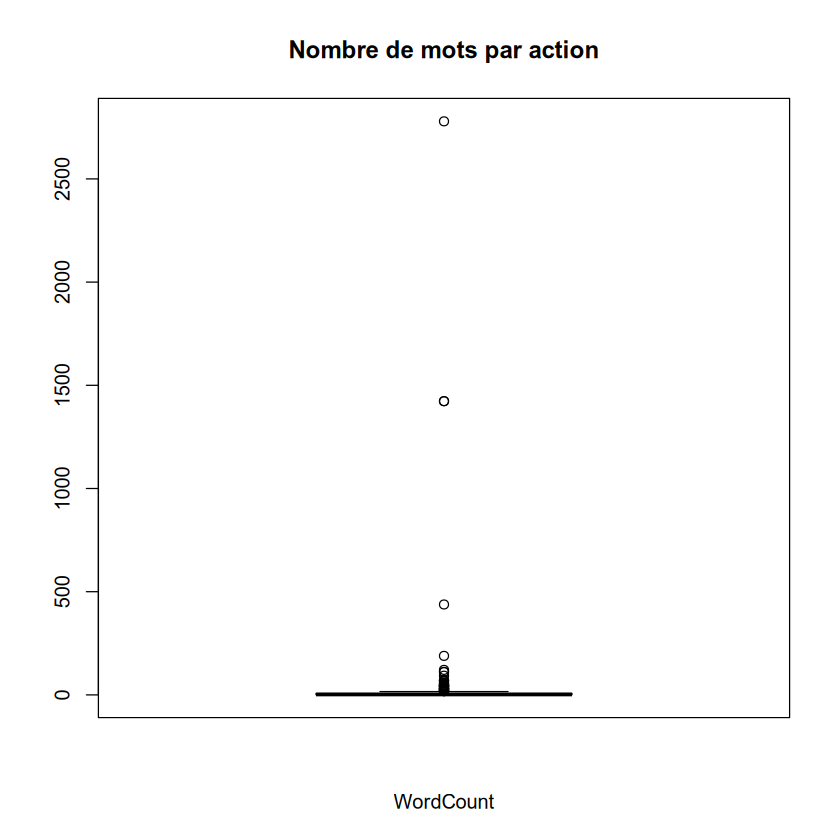

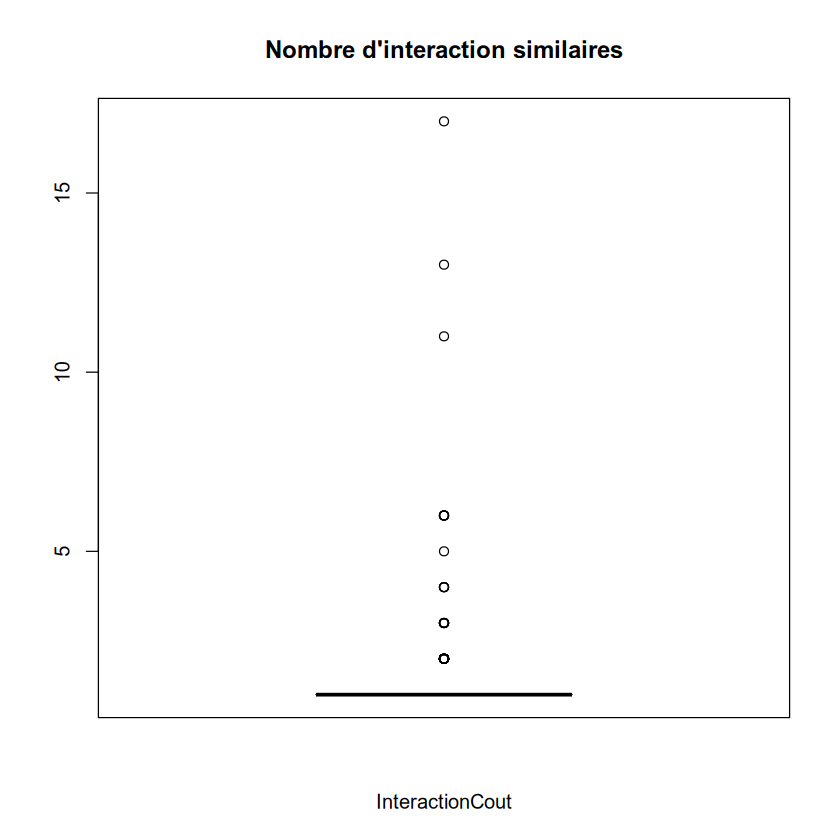

In [20]:
boxplot(zapata_rail_edit_edgelist$WordCount, xlab = "WordCount",
        main = "Nombre de mots par action")

boxplot(zapata_rail_edit_edgelist$InteractionCount, xlab = "InteractionCout",
        main = "Nombre d'interaction similaires")

In [4]:
head(zapata_rail_edit_attributes)

,X,Users,Status,TotalWordCount
,<int>,<chr>,<chr>,<int>
1,1,Stavenn,User,189
2,110,Page,Page,0
3,2,217.12.16.48,Anon,3
4,3,217.12.16.49,Anon,27
5,4,Smallweed,User,8
6,5,Birdingcuba64~enwiki,User,16


La base d'attributs décrit les charactéristiques des utilisateurs listés dans le réseau d'édition. Là ou la base *edgelist* nous montre une ligne par action, ici, la base nous montre une ligne par contributeur unique qui a modifié à un moment la page Zapata Rail.

La base nous donne le statut du contributeur ($Status). Celui ci peut être:

- Anon: Contributeur anonyme, non inscrit sur wikipédia. Il est identifié par l'adresse IP utilisée lors de la modification.
- Page: La page apparait dans la liste des attributs pour des raisons techniques. Elle n'a évidemment pas d'autres caractéristiques que d'être "la page".
- Admin: Administrateurs wikipédia: utilisateurs élus disposant de droits d'édition et de modération élargis.
- Bot: Robots pour la mise en forme, la correction, et l'édition automatique.
- Users: Contributeurs inscrits, identifiés par leur pseudos.

On observe la distribution des status des auteurs de la page à l'aide de la fonction table:

In [21]:
table(zapata_rail_edit_attributes$Status)


Admin  Anon   Bot  Page  User 
   12    16    10     1    71 

La variable TotalWordCount nous donne le nombre total de mots contribués par l'utilisateur à la page (ADD uniquement donc).

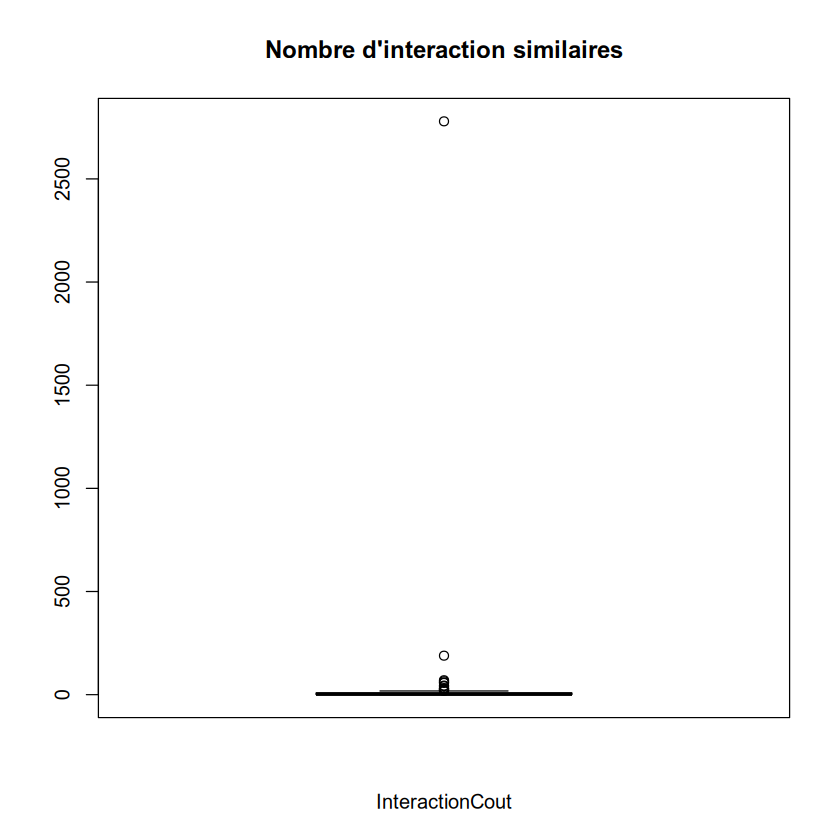

In [22]:
boxplot(zapata_rail_edit_attributes$TotalWordCount, xlab = "InteractionCout",
        main = "Nombre d'interaction similaires")